In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("credit.csv" , header =1)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4815,4816,50000,1,2,3,37,0,0,0,0,...,43803,41425,42536,2005,2056,1737,1501,1797,1680,0
21001,21002,280000,1,3,1,40,2,0,0,0,...,191291,189029,192023,10000,9000,8000,6738,6974,7600,1
25977,25978,170000,2,1,2,40,-2,-2,-2,-2,...,0,280,280,0,1980,0,280,280,1111,1
19651,19652,240000,2,2,1,32,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
28858,28859,90000,2,2,1,32,0,0,2,2,...,88577,86365,91105,8200,0,7200,0,6200,24,0
8261,8262,180000,2,2,1,31,0,0,0,0,...,115551,109539,108837,10122,35206,40600,5000,10000,10000,0
473,474,60000,1,3,1,38,1,2,2,0,...,32193,34213,35002,1800,1500,2000,2700,1500,0,0
28696,28697,230000,2,2,1,34,2,-1,-1,-1,...,2528,1865,1496,2329,1894,2532,1865,1496,1873,0
23339,23340,160000,2,3,1,44,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8189,8190,130000,2,2,2,25,-2,-2,-2,-2,...,550,-286,55138,1200,1300,964,1698,60549,5000,1


In [5]:
data.shape

(30000, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data["Defaulted"] = data["default payment next month"].map({1: 1, 0: 0})  
data["Paid"] = data["default payment next month"].map({1: 0, 0: 1})

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Defaulted', 'Paid'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Default vs Paid Customers')

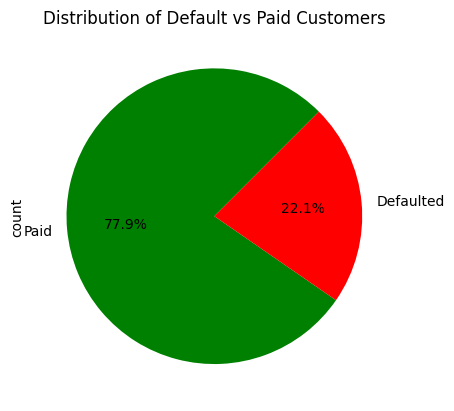

In [11]:
data['Defaulted'].value_counts().plot(kind = 'pie' , labels=['Paid', 'Defaulted'] , autopct='%1.1f%%', startangle=45 , colors = ['g','r'])
plt.title("Distribution of Default vs Paid Customers")

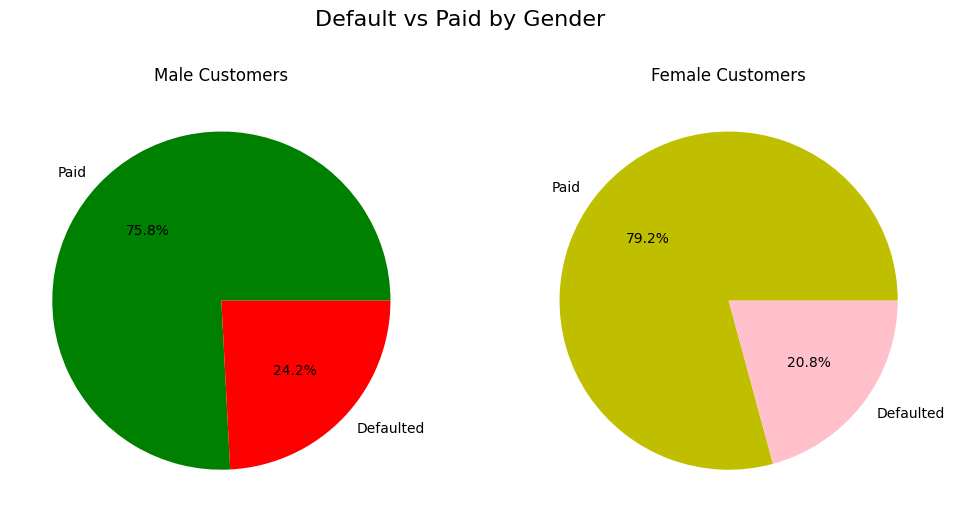

In [12]:
male_data = data[data['SEX'] == 1]['Defaulted'].value_counts()
female_data = data[data['SEX'] == 2]['Defaulted'].value_counts()
# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Male pie
axes[0].pie(male_data, labels=['Paid', 'Defaulted'], autopct='%1.1f%%',  colors=['g','r'])
axes[0].set_title("Male Customers")
# Female pie
axes[1].pie(female_data, labels=['Paid', 'Defaulted'], autopct='%1.1f%%',colors=['y','pink'])
axes[1].set_title("Female Customers")
plt.suptitle("Default vs Paid by Gender", fontsize=16)
plt.show()

Text(0.5, 1.0, 'EDUCATION AND COUNT')

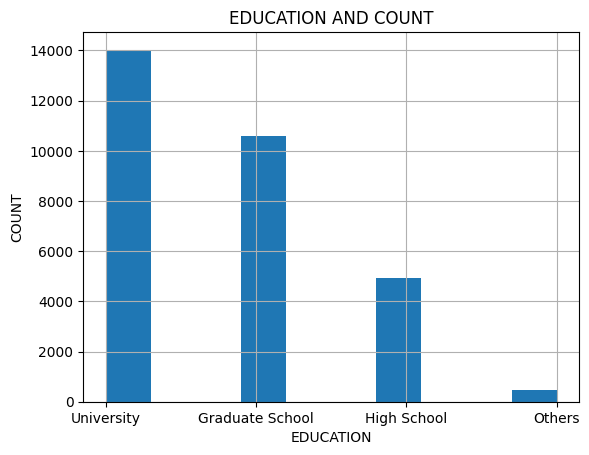

In [13]:
edu_map = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Others",
    6: "Others",
    0: "Others"   
}

data['EDUCATION_LABEL'] = data['EDUCATION'].map(edu_map)

data['EDUCATION_LABEL'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION AND COUNT')

Text(0.5, 1.0, 'EDUCATION VS DEFAULTED BASED ON GENDER')

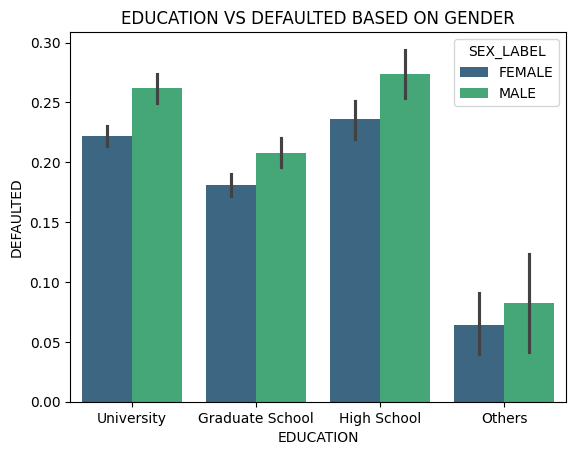

In [14]:
edu_map = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Others",
    6: "Others",
    0: "Others"   
}

edu_sex = {
    1:'MALE',
    2:'FEMALE'
}
data['SEX_LABEL'] = data['SEX'].map(edu_sex)

data['EDUCATION_LABEL'] = data['EDUCATION'].map(edu_map)

sns.barplot(
    x='EDUCATION_LABEL', 
    y='Defaulted', 
    data=data,
    hue = 'SEX_LABEL',
    palette="viridis"
)
plt.xlabel('EDUCATION')
plt.ylabel('DEFAULTED')
plt.title('EDUCATION VS DEFAULTED BASED ON GENDER')

Text(0.5, 1.0, 'MARRIAGE AND COUNT')

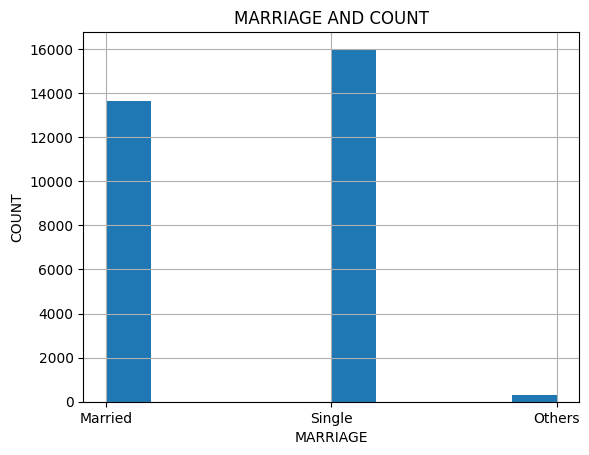

In [15]:
edu_married = {
    1: "Married",
    2: "Single",
    3: "Others",   
}
data['MARRIAGE_LABEL'] =  data['MARRIAGE'].map(edu_married)

data['MARRIAGE_LABEL'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE AND COUNT')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\3925444555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='LIMIT_BAL', data=data, palette=['g', 'r'])


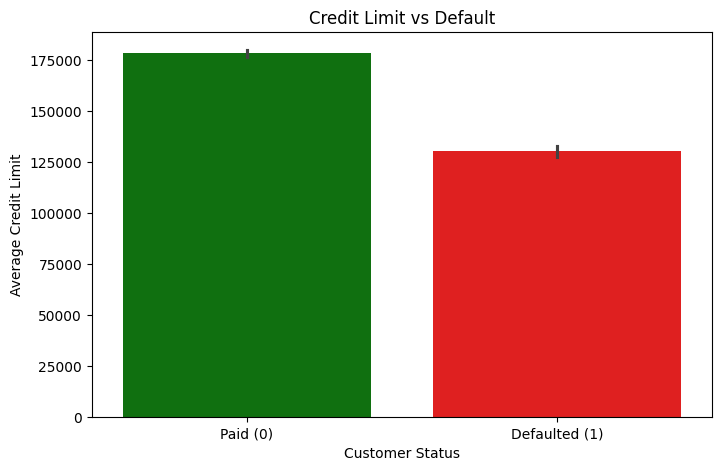

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Defaulted', y='LIMIT_BAL', data=data, palette=['g', 'r']) 
plt.title("Credit Limit vs Default")
plt.xlabel("Customer Status")
plt.ylabel("Average Credit Limit")
plt.xticks([0, 1], ["Paid (0)", "Defaulted (1)"], color="black")
plt.show()

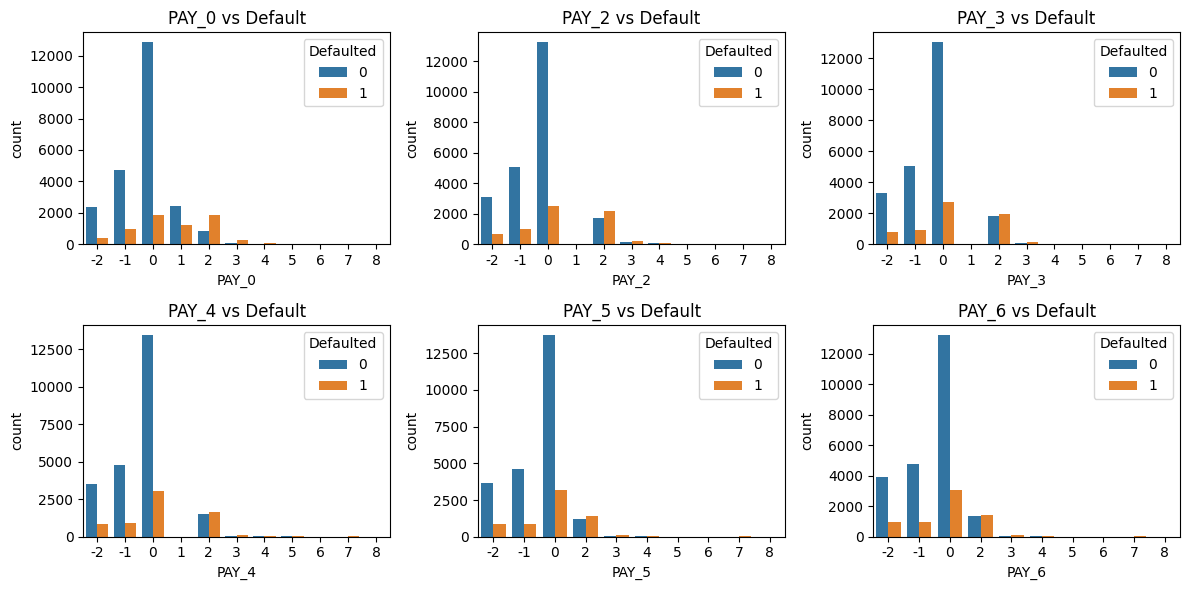

In [17]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

plt.figure(figsize=(12,6))
for i, col in enumerate(pay_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Defaulted', data=data)
    plt.title(f"{col} vs Default")
plt.tight_layout()
plt.show()

In [18]:
data.corr(numeric_only=True)['Defaulted']*100

ID                             -1.395195
LIMIT_BAL                     -15.351988
SEX                            -3.996058
EDUCATION                       2.800608
MARRIAGE                       -2.433922
AGE                             1.388983
PAY_0                          32.479373
PAY_2                          26.355120
PAY_3                          23.525251
PAY_4                          21.661364
PAY_5                          20.414891
PAY_6                          18.686636
BILL_AMT1                      -1.964420
BILL_AMT2                      -1.419322
BILL_AMT3                      -1.407552
BILL_AMT4                      -1.015650
BILL_AMT5                      -0.676046
BILL_AMT6                      -0.537231
PAY_AMT1                       -7.292949
PAY_AMT2                       -5.857871
PAY_AMT3                       -5.625035
PAY_AMT4                       -5.682740
PAY_AMT5                       -5.512352
PAY_AMT6                       -5.318334
default payment 

In [19]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Defaulted,Paid
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.221200,0.778800
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.415062,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.000000,1.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000


In [20]:
data['AVG_BILL'] = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\2760143986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='AVG_BILL', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])


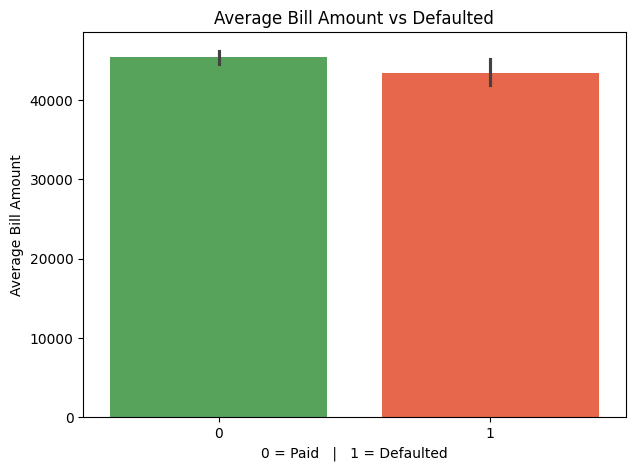

In [21]:
plt.figure(figsize=(7,5))
sns.barplot(x='Defaulted', y='AVG_BILL', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])
plt.title("Average Bill Amount vs Defaulted")
plt.xlabel("0 = Paid   |   1 = Defaulted")
plt.ylabel("Average Bill Amount")
plt.show()

In [22]:
data['AVG_PAY'] = data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\520846675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='AVG_PAY', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])


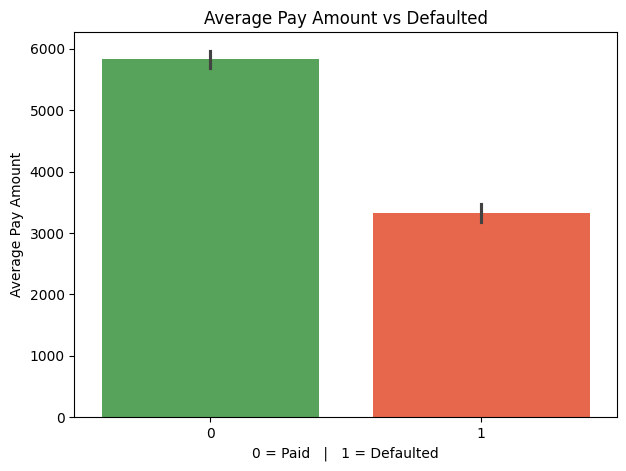

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(x='Defaulted', y='AVG_PAY', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])
plt.title("Average Pay Amount vs Defaulted")
plt.xlabel("0 = Paid   |   1 = Defaulted")
plt.ylabel("Average Pay Amount")
plt.show()

In [24]:
data['PAY_RATIO'] = data['AVG_PAY'] / (data['AVG_BILL'] + 1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\2147965168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='PAY_RATIO', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])


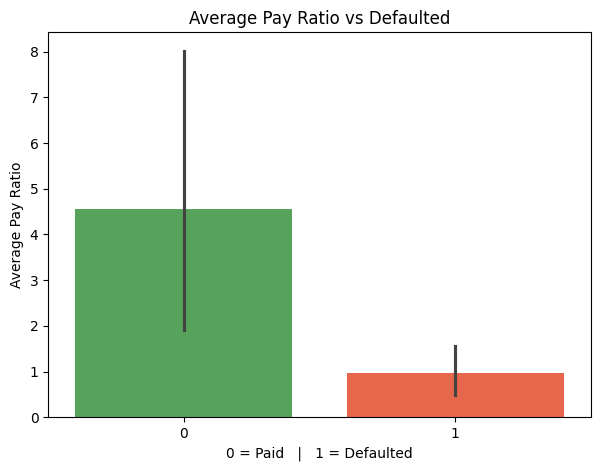

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(x='Defaulted', y='PAY_RATIO', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])
plt.title("Average Pay Ratio vs Defaulted")
plt.xlabel("0 = Paid   |   1 = Defaulted")
plt.ylabel("Average Pay Ratio")
plt.show()

In [26]:
data['UTILIZATION'] = data['AVG_BILL'] / (data['LIMIT_BAL'] + 1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\3244437009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='UTILIZATION', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])


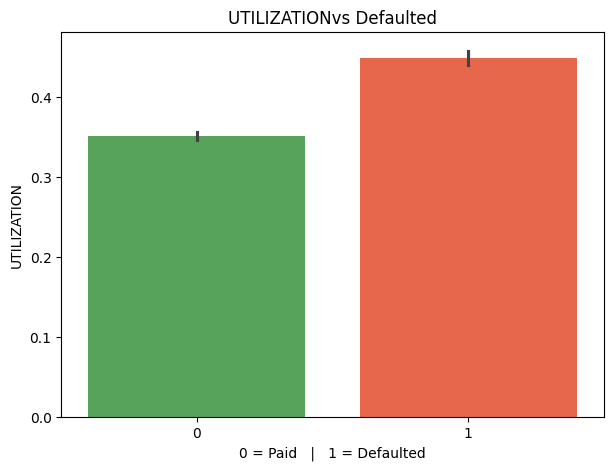

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(x='Defaulted', y='UTILIZATION', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])
plt.title("UTILIZATIONvs Defaulted")
plt.xlabel("0 = Paid   |   1 = Defaulted")
plt.ylabel("UTILIZATION")
plt.show()

In [28]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
data['TOTAL_DELAY'] = (data[pay_cols] > 0).sum(axis=1)  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\3923575884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defaulted', y='TOTAL_DELAY', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])


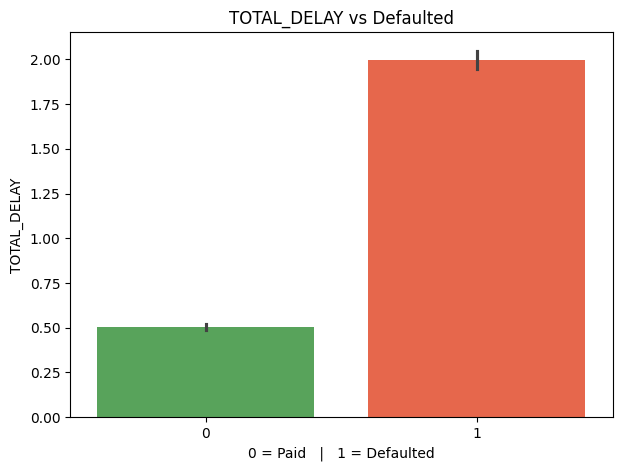

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x='Defaulted', y='TOTAL_DELAY', data=data, estimator='mean', palette=['#4CAF50','#FF5733'])
plt.title("TOTAL_DELAY vs Defaulted")
plt.xlabel("0 = Paid   |   1 = Defaulted")
plt.ylabel("TOTAL_DELAY")
plt.show()

In [30]:
allCorr = data.corr(numeric_only=True)['Defaulted']*100
allCorr 

ID                             -1.395195
LIMIT_BAL                     -15.351988
SEX                            -3.996058
EDUCATION                       2.800608
MARRIAGE                       -2.433922
AGE                             1.388983
PAY_0                          32.479373
PAY_2                          26.355120
PAY_3                          23.525251
PAY_4                          21.661364
PAY_5                          20.414891
PAY_6                          18.686636
BILL_AMT1                      -1.964420
BILL_AMT2                      -1.419322
BILL_AMT3                      -1.407552
BILL_AMT4                      -1.015650
BILL_AMT5                      -0.676046
BILL_AMT6                      -0.537231
PAY_AMT1                       -7.292949
PAY_AMT2                       -5.857871
PAY_AMT3                       -5.625035
PAY_AMT4                       -5.682740
PAY_AMT5                       -5.512352
PAY_AMT6                       -5.318334
default payment 

In [31]:
corr = data[['Defaulted','LIMIT_BAL','AVG_BILL','AVG_PAY','PAY_RATIO','UTILIZATION','TOTAL_DELAY']].corr()*100
corr

,Defaulted,LIMIT_BAL,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
Defaulted,100.000000,-15.351988,-1.269136,-10.235439,-0.710012,11.548060,39.839436
LIMIT_BAL,-15.351988,100.000000,30.204380,35.265495,1.566979,-38.335680,-23.676344
AVG_BILL,-1.269136,30.204380,100.000000,34.390621,-1.237485,54.776676,0.908342
AVG_PAY,-10.235439,35.265495,34.390621,100.000000,1.282292,3.213244,-12.825437
PAY_RATIO,-0.710012,1.566979,-1.237485,1.282292,100.000000,-1.851798,-0.435839
UTILIZATION,11.548060,-38.335680,54.776676,3.213244,-1.851798,100.000000,23.437344
TOTAL_DELAY,39.839436,-23.676344,0.908342,-12.825437,-0.435839,23.437344,100.000000


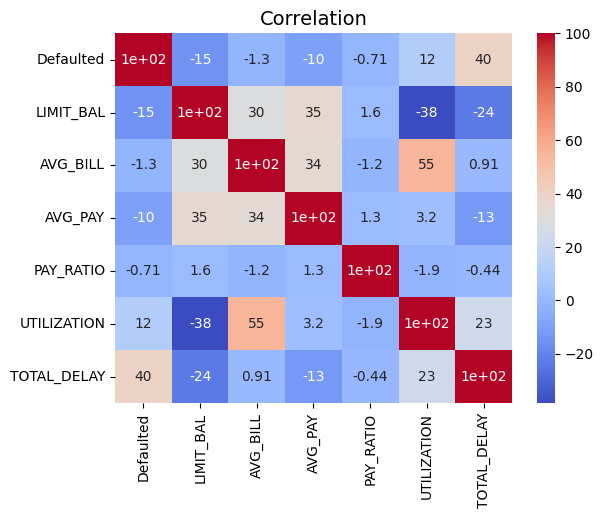

In [32]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation", fontsize=14)
plt.show()

In [33]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Defaulted', 'Paid', 'EDUCATION_LABEL',
       'SEX_LABEL', 'MARRIAGE_LABEL', 'AVG_BILL', 'AVG_PAY', 'PAY_RATIO',
       'UTILIZATION', 'TOTAL_DELAY'],
      dtype='object')

In [34]:
data.drop(columns = ['ID' ,  'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','Defaulted', 'Paid','MARRIAGE_LABEL', 'EDUCATION_LABEL','SEX_LABEL'] ,inplace = True)

In [35]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'AVG_BILL', 'AVG_PAY', 'PAY_RATIO', 'UTILIZATION', 'TOTAL_DELAY'],
      dtype='object')

In [36]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,1284.000000,114.833333,0.089364,0.064197,2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,2846.166667,833.333333,0.292689,0.023718,2
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,16942.166667,1836.333333,0.108382,0.188244,0
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,38555.666667,1398.000000,0.036258,0.771098,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,18223.166667,9841.500000,0.540025,0.364456,0


In [37]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
AVG_BILL                      0
AVG_PAY                       0
PAY_RATIO                     2
UTILIZATION                   0
TOTAL_DELAY                   0
dtype: int64

In [38]:
data['PAY_RATIO'].fillna(0, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20772\3952682671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PAY_RATIO'].fillna(0, inplace=True)


In [39]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
AVG_BILL                      0
AVG_PAY                       0
PAY_RATIO                     0
UTILIZATION                   0
TOTAL_DELAY                   0
dtype: int64

In [40]:
data.duplicated().sum()

np.int64(35)

In [41]:
data = data.drop_duplicates()

In [42]:
data.duplicated().sum()

np.int64(0)

In [43]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,1284.000000,114.833333,0.089364,0.064197,2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,2846.166667,833.333333,0.292689,0.023718,2
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,16942.166667,1836.333333,0.108382,0.188244,0
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,38555.666667,1398.000000,0.036258,0.771098,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,18223.166667,9841.500000,0.540025,0.364456,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  PAY_AMT1                    29965 non-null  int64  
 12  PAY_AMT2                    29965 non-null  int64  
 13  PAY_AMT3                    29965 no

In [43]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,5231.688837,4831.617454,4804.897047,5221.498014,0.221258,45029.328116,5281.297308,3.769974,0.373473,0.834273
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,63279.074163,10142.306855,209.766350,0.351859,1.554821
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-56043.166667,0.000000,-1502.000000,-0.232585,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,300.000000,261.000000,131.000000,0.000000,4841.000000,1116.666667,0.041110,0.030300,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1804.000000,1500.000000,1500.000000,1500.000000,0.000000,21110.833333,2400.000000,0.086381,0.285627,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4512.000000,4016.000000,4042.000000,4000.000000,0.000000,57166.166667,5600.000000,0.598753,0.688441,1.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,877313.833333,627344.333333,27000.000000,5.364040,6.000000


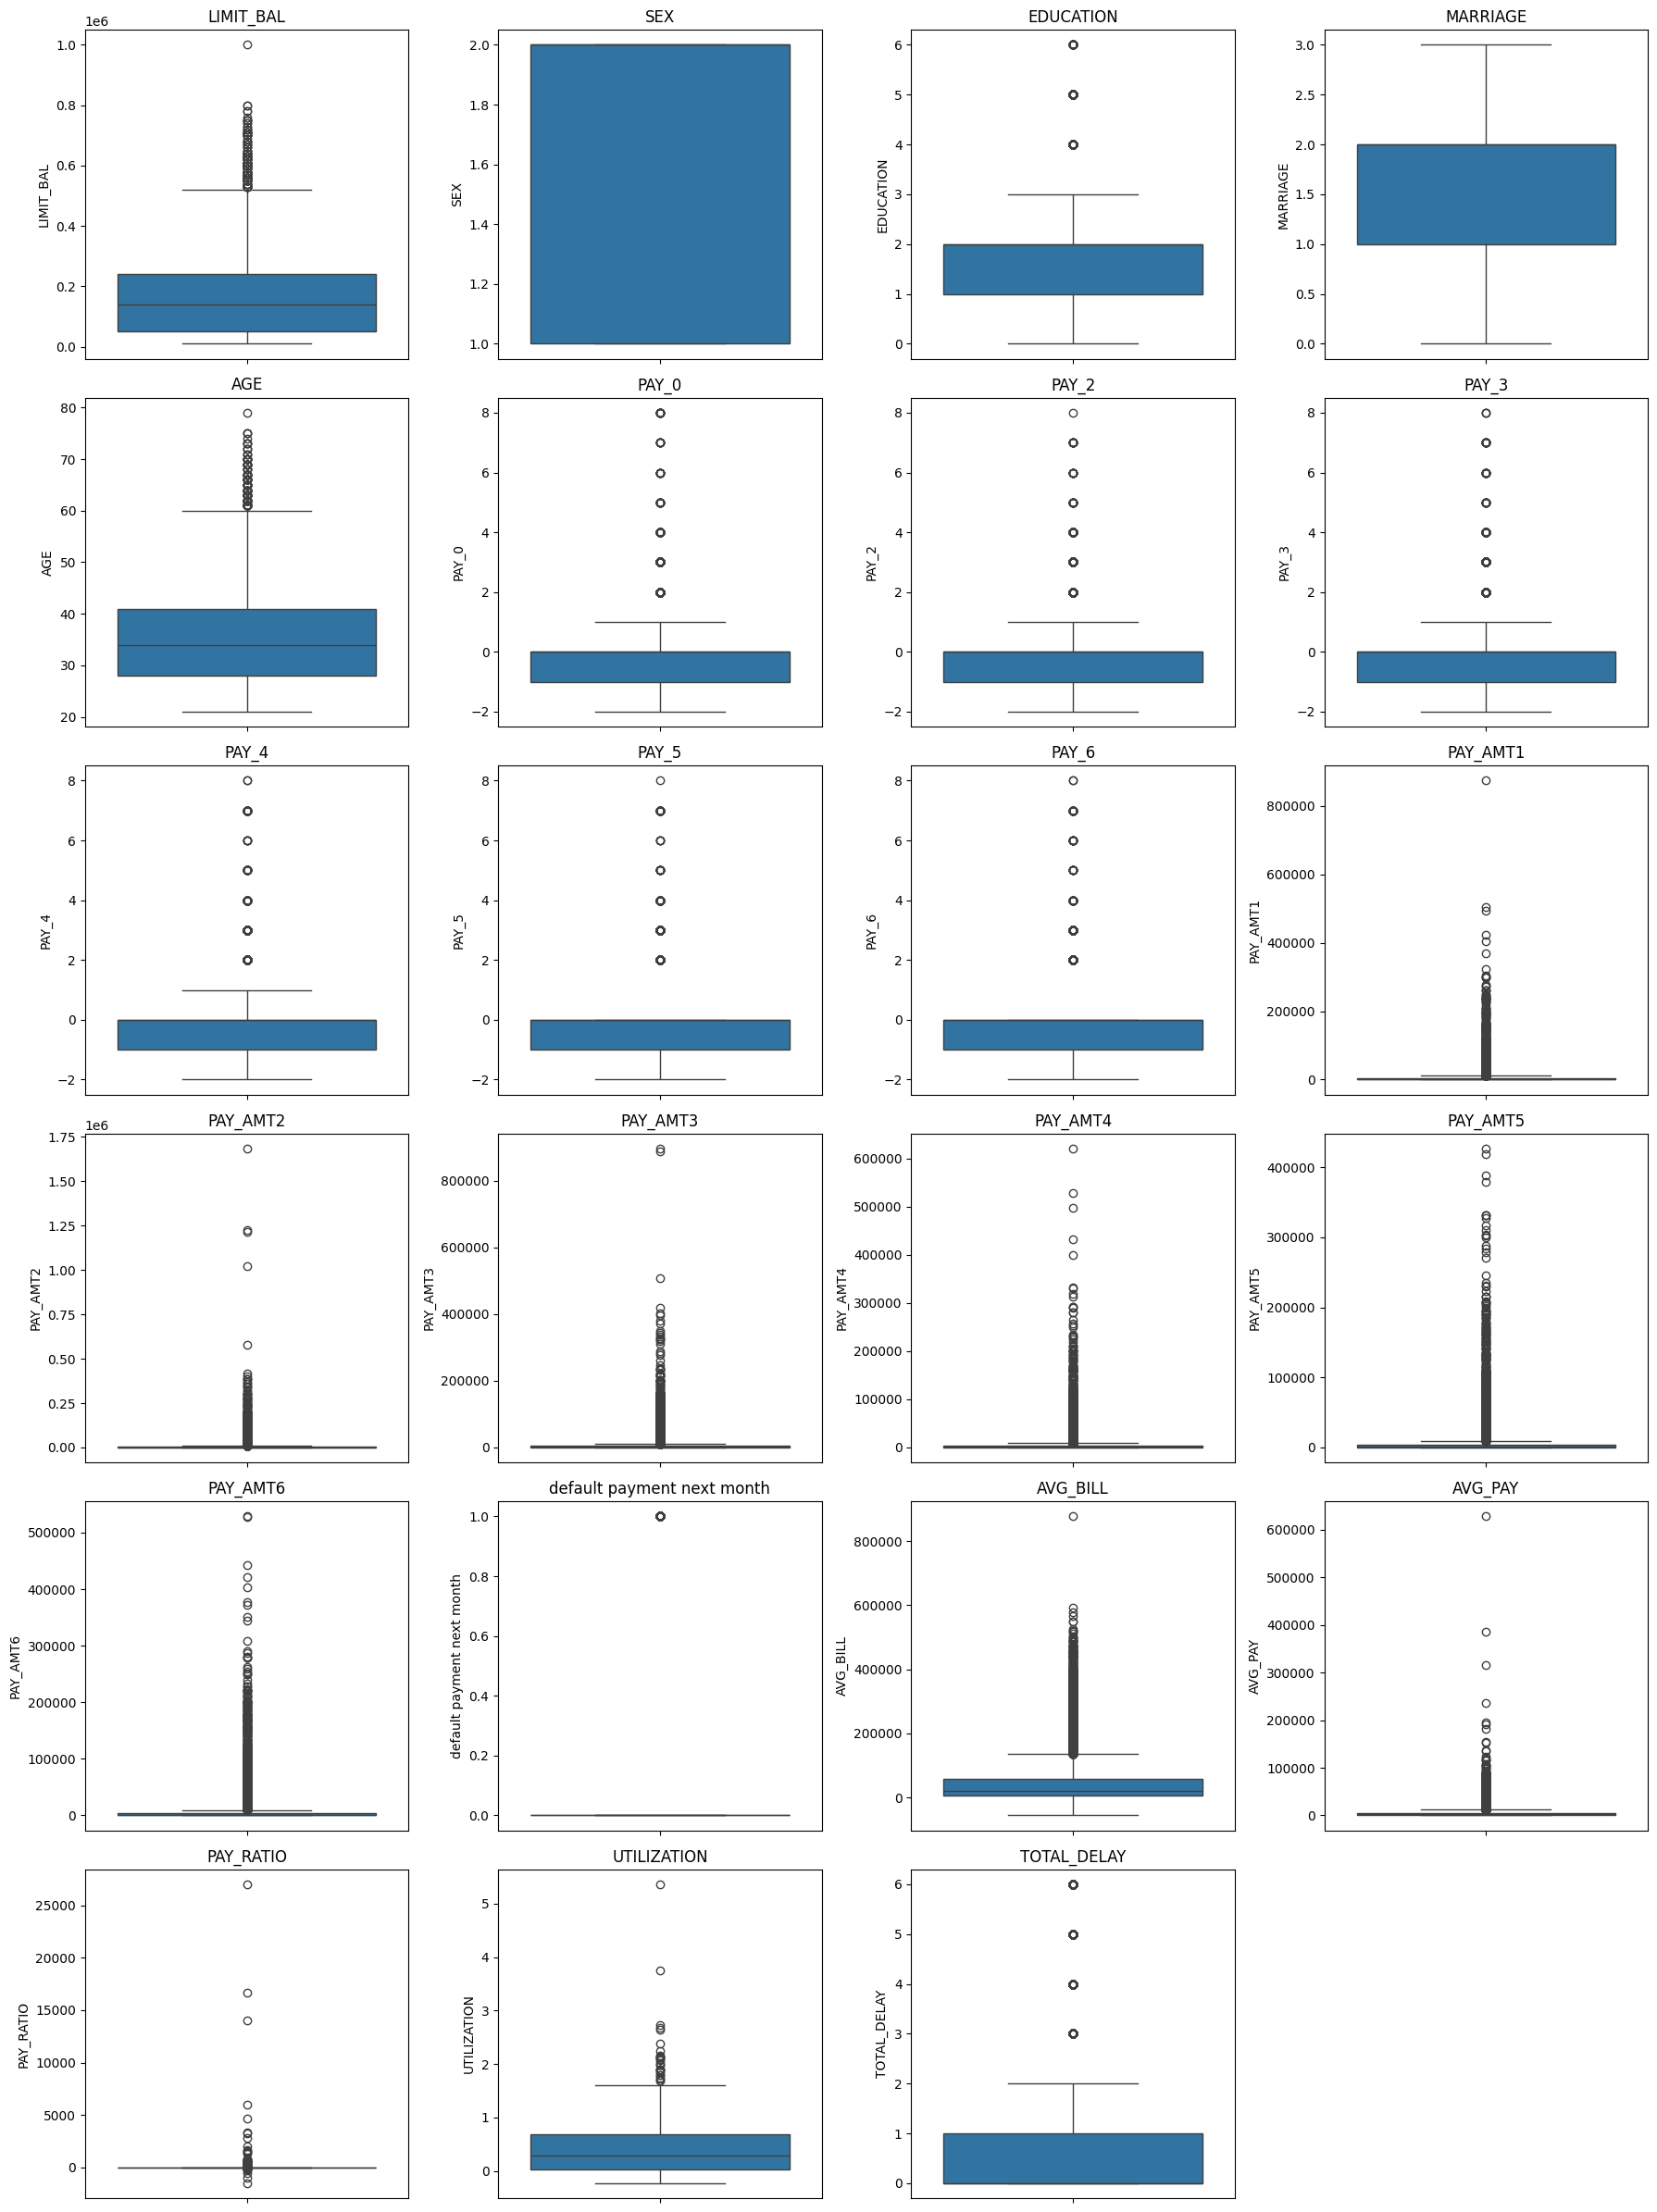

In [44]:
import math
num_cols = data.select_dtypes(include=['int64','float64']).columns
n_cols = 4  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [45]:
import numpy as np

In [46]:
data_capped = data.copy()

In [47]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [48]:
exclude_cols = ['default payment next month']
num_cols = [col for col in num_cols if col not in exclude_cols]

In [49]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data_capped[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

In [50]:
data.shape

(29965, 23)

In [51]:
data_capped.shape

(29965, 23)

In [52]:
# num_cols = data_capped.select_dtypes(include=['int64','float64']).columns

# plt.figure(figsize=(18, len(num_cols)*3))

# for i, col in enumerate(num_cols, 1):
#     plt.subplot(len(num_cols), 1, i)
#     data_capped.boxplot(column=col)
#     plt.title(col)

# plt.tight_layout()
# plt.show()

data_capped.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,166924.567996,1.603738,1.833306,1.551877,35.451894,-0.094160,-0.230552,-0.257901,-0.302236,-0.337611,...,3040.784549,2721.462139,2735.967662,2715.549174,0.221258,38677.933928,3922.207826,0.333709,0.372947,0.586034
std,128023.825407,0.489128,0.724379,0.521997,9.107477,0.951423,0.990704,0.994460,0.968578,0.946777,...,3359.514752,3073.955917,3097.544925,3127.250715,0.415101,42995.082171,3797.841781,0.420464,0.348770,0.915312
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-56043.166667,0.000000,-0.795355,-0.232585,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,300.000000,261.000000,131.000000,0.000000,4841.000000,1116.666667,0.041110,0.030300,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1804.000000,1500.000000,1500.000000,1500.000000,0.000000,21110.833333,2400.000000,0.086381,0.285627,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4512.000000,4016.000000,4042.000000,4000.000000,0.000000,57166.166667,5600.000000,0.598753,0.688441,1.000000
max,525000.000000,2.000000,3.500000,3.000000,60.500000,1.500000,1.500000,1.500000,1.500000,1.500000,...,10695.000000,9590.000000,9713.500000,9803.500000,1.000000,135653.916667,12325.000000,1.435218,1.675654,2.500000


In [53]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,1284.000000,114.833333,0.089364,0.064197,2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,2846.166667,833.333333,0.292689,0.023718,2
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,16942.166667,1836.333333,0.108382,0.188244,0
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,38555.666667,1398.000000,0.036258,0.771098,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,18223.166667,9841.500000,0.540025,0.364456,0


In [54]:
data_capped.sample(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
11720,200000.0,1.0,2.0,1.0,58.0,1.5,1.5,0.0,0.0,1.5,...,10695.0,14.0,6021.0,5099.0,0,135653.916667,5284.333333,0.028439,0.929056,2.5
12241,400000.0,2.0,3.0,1.0,42.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10695.0,9590.0,3978.0,2390.0,0,14088.333333,12325.000000,0.908347,0.035221,0.0
7374,180000.0,1.0,2.0,2.0,38.0,-1.0,-1.0,1.5,0.0,0.0,...,2000.0,2000.0,2000.0,3000.0,1,52588.166667,2233.333333,0.042468,0.292155,1.0
29535,20000.0,1.0,2.0,1.0,34.0,1.0,1.5,1.5,0.0,0.0,...,2000.0,1000.0,1500.0,1010.0,0,17521.833333,1135.000000,0.064773,0.876048,2.5
25895,340000.0,2.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,...,10695.0,9590.0,9713.5,9803.5,0,135653.916667,12325.000000,0.226119,0.674567,0.0
29782,300000.0,1.0,3.0,1.0,32.0,-1.0,-1.0,-1.0,0.0,0.0,...,2000.0,0.0,800.0,15.0,0,1428.000000,1151.833333,0.806042,0.004760,0.0
26452,230000.0,2.0,3.0,1.0,50.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,2936.0,3493.0,3160.0,2784.0,0,2973.333333,2972.500000,0.999384,0.012927,0.0
13227,180000.0,2.0,2.0,2.0,28.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,2530.0,0.0,0.0,0.0,0,980.333333,617.500000,0.629246,0.005446,0.0
21824,290000.0,2.0,1.0,2.0,25.0,-1.0,-1.0,-1.0,0.0,0.0,...,10695.0,3449.0,7000.0,9803.5,0,16287.833333,12166.166667,0.746902,0.056165,0.0
5106,20000.0,2.0,3.5,3.0,35.0,0.0,0.0,0.0,0.0,0.0,...,1500.0,1300.0,1500.0,1000.0,0,17000.000000,1307.833333,0.076927,0.849958,0.0


In [55]:
data_capped.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
AVG_BILL                      0
AVG_PAY                       0
PAY_RATIO                     0
UTILIZATION                   0
TOTAL_DELAY                   0
dtype: int64

In [56]:
data.duplicated().sum()

np.int64(0)

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
data_capped.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL,AVG_PAY,PAY_RATIO,UTILIZATION,TOTAL_DELAY
0,20000.0,2.0,2.0,1.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,1,1284.000000,114.833333,0.089364,0.064197,2.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,1.5,0.0,0.0,0.0,...,1000.0,1000.0,0.0,2000.0,1,2846.166667,833.333333,0.292689,0.023718,2.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,1000.0,5000.0,0,16942.166667,1836.333333,0.108382,0.188244,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1200.0,1100.0,1069.0,1000.0,0,38555.666667,1398.000000,0.036258,0.771098,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,10000.0,9000.0,689.0,679.0,0,18223.166667,9841.500000,0.540025,0.364456,0.0


In [59]:
cat= ["SEX", "EDUCATION", "MARRIAGE"]
y = data_capped["default payment next month"]
x = data_capped.drop(columns=["default payment next month"]) 

num = [c for c in x.columns if c not in cat]



In [60]:
num

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'AVG_BILL',
 'AVG_PAY',
 'PAY_RATIO',
 'UTILIZATION',
 'TOTAL_DELAY']

In [61]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42, stratify=y )
X_train.shape, X_test.shape

((23972, 22), (5993, 22))

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat),
        ("num", StandardScaler(), num),
    ]
)

In [63]:
X_preprocessed = preprocessor.fit_transform(x)
print("Shape before preprocessing:", x.shape)
print("Shape after preprocessing:", X_preprocessed.shape)

Shape before preprocessing: (29965, 22)
Shape after preprocessing: (29965, 27)


In [64]:
print("y_train distribution:")
print(y_train.value_counts(normalize=True))

print("\ny_test distribution:")
print(y_test.value_counts(normalize=True))


y_train distribution:
default payment next month
0    0.778742
1    0.221258
Name: proportion, dtype: float64

y_test distribution:
default payment next month
0    0.778742
1    0.221258
Name: proportion, dtype: float64


In [65]:
lr_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),   # preprocess categorical + numeric
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])



In [66]:
lr_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
y_PRED_LR = lr_pipe.predict(X_test)
print("Logistic Regression — Accuracy:", accuracy_score(y_test, y_PRED_LR))
# print("\nClassification Report (LR):\n", classification_report(y_test, y_PRED_LR))
# print("Confusion Matrix (LR):\n", confusion_matrix(y_test, y_PRED_LR))

Logistic Regression — Accuracy: 0.7480393792758218


In [69]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1"]

cv_lr = cross_validate(lr_pipe, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
print("LR CV — Accuracy:", cv_lr["test_accuracy"].mean())
print("LR CV — Precision:", cv_lr["test_precision"].mean())
print("LR CV — Recall:", cv_lr["test_recall"].mean())
print("LR CV — F1:", cv_lr["test_f1"].mean())


LR CV — Accuracy: 0.7512513947961542
LR CV — Precision: 0.45422270475287385
LR CV — Recall: 0.6182286324380253
LR CV — F1: 0.52362772915753


In [70]:
svc_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", SVC(kernel="rbf", probability=True,class_weight="balanced", random_state=42))
])

svc_pipe.fit(X_train, y_train)
 

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
y_pred_svc = svc_pipe.predict(X_test)
print("SVC — Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC — Accuracy: 0.7590522275988654


In [76]:
# cv_svc = cross_validate(svc_pipe, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
# print("SVC CV — Accuracy:", cv_svc["test_accuracy"].mean())
# print("SVC CV — Precision:", cv_svc["test_precision"].mean())
# print("SVC CV — Recall:", cv_svc["test_recall"].mean())
# print("SVC CV — F1:", cv_svc["test_f1"].mean())

SVC CV — Accuracy: 0.7624722595980463
SVC CV — Precision: 0.4721605271472257
SVC CV — Recall: 0.619180820268315
SVC CV — F1: 0.5356035911926125


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight="balanced"
    ))
])

In [78]:
rf_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [79]:
y_pred_rf = rf_pipe.predict(X_test)
print("RF — Accuracy:", accuracy_score(y_test, y_pred_rf))

RF — Accuracy: 0.8146170532287669


In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1"]

cv_rf = cross_validate(rf_pipe, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)



In [81]:
print("RF CV — Accuracy:", cv_rf["test_accuracy"].mean())
print("RF CV — Precision:", cv_rf["test_precision"].mean())
print("RF CV — Recall:", cv_rf["test_recall"].mean())
print("RF CV — F1:", cv_rf["test_f1"].mean())

RF CV — Accuracy: 0.81444986629533
RF CV — Precision: 0.6499715102411345
RF CV — Recall: 0.35003566834394356
RF CV — F1: 0.45495144154963124


In [82]:
# Example risky customer (likely DEFAULT)
sample_customer = pd.DataFrame([{
    "LIMIT_BAL": 10000,       
    "SEX": 2,                 
    "EDUCATION": 3,          
    "MARRIAGE": 0,           
    "AGE": 22,                
    "PAY_0": 2,              
    "PAY_2": 2,              
    "PAY_3": 3,              
    "PAY_4": 3,              
    "PAY_5": 2,               
    "PAY_6": 2,              
      "AVG_BILL": 25000,
    "AVG_PAY": 500,
    "PAY_RATIO": 0.05,      
    "UTILIZATION": 0.9,     
    "TOTAL_DELAY": 3,
    "PAY_AMT1": 0,           
    "PAY_AMT2": 0,
    "PAY_AMT3": 0,
    "PAY_AMT4": 0,
    "PAY_AMT5": 0,
    "PAY_AMT6": 0
}])


In [83]:
pred = lr_pipe.predict(sample_customer)[0]
prob = lr_pipe.predict_proba(sample_customer)[0][1]  # probability of default

print("Prediction:", "DEFAULT" if pred==1 else "PAID")
print("Probability of DEFAULT:", round(prob, 2))


Prediction: DEFAULT
Probability of DEFAULT: 0.8
